# Tracer Boundary Indexing

A temporal notebook that tests the best location to set tracers' open boundary.

In [2]:
import sys
sys.path.insert(0, '../_libs/')
import NEMO_tools as Nts

In [3]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [4]:
MAT = scipy.io.loadmat('../_data/Exchange/NEMO_ORCA2_Ba.mat')
Ba_ini_orca = MAT['Ba_ini_orca'][:]
nav_lat = MAT['nav_lat'][:]
nav_lon = MAT['nav_lon'][:]

MAT = scipy.io.loadmat('../_data/Exchange/NEMO_ORCA2_d18O.mat')
d18O_ini_orca = MAT['d18O_ini_orca'][:]
nav_lat = MAT['nav_lat'][:]
nav_lon = MAT['nav_lon'][:]

In [5]:
Ba_ini_orca.shape

(31, 149, 182)

In [30]:
field = np.zeros([31, 149, 182])
domain = np.zeros(nav_lon.shape)
Ba_boundary = np.zeros([31, 149, 182])
d18O_boundary = np.zeros([31, 149, 182])

In [31]:
domain[nav_lat>57]=1.0

In [32]:
for i in range(182):
    for j in range(148):
        for k in range(31):
            if ((nav_lat[j, i]<=57) and (nav_lat[j+1, i]>57)):
                #field[k, j+1, i] = 1.0
                field[k, j  , i] = 1.0
                field[k, j-1, i] = 1.0

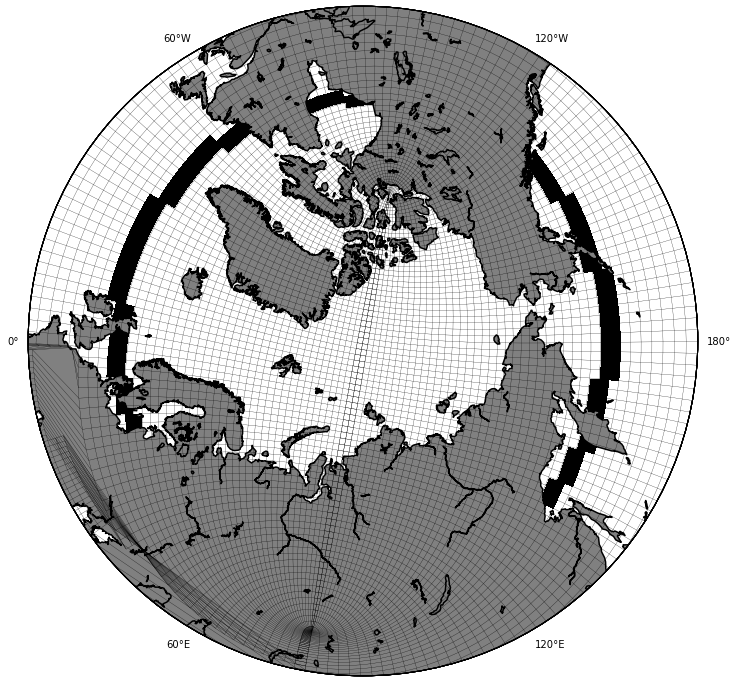

In [38]:
fig=plt.figure(figsize=(12, 12)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=45, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
proj.pcolor(x, y, field[1, :, :], vmin=0, vmax=0.1, cmap=plt.cm.gray_r)
proj.plot(x, y, 'k-', linewidth=0.25);
proj.plot(x.T, y.T, 'k-', linewidth=0.25);
#ax.set_title('Tracer Boundary', fontsize=14)
plt.show()
#fig.savefig('Publish/Barium_boundary.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
#            transparent=False, bbox_inches='tight', pad_inches=0)

In [10]:
#for i in range(182):
#    for j in range(149):
#        for k in range(31):
#            if (field[k, j, i]==1):
#                Ba_boundary[k, j, i] = Ba_ini_orca[k, j, i]
#                d18O_boundary[k, j, i] = d18O_ini_orca[k, j, i]
#            else:
#                Ba_boundary[k, j, i] = -999.9
#                d18O_boundary[k, j, i] = -999.9

In [10]:
#plt.contourf(d18O_ini_orca[2, :, :])
#plt.contourf(field[0, :, :])

In [12]:
#save_var = { 'Ba': Ba_boundary, 'd18O': d18O_boundary, 'domain': domain}
#scipy.io.savemat('_data/Exchange/TRC_BOUND.mat', mdict=save_var)